# Benchmark queries for Opensearch and Elasticsearch

This notebook executes the queries for Opensearch or Elasticsearch and measure the execution time of them. It shows you the results in ms for each execution and provide visualization for the results.

In [14]:
%cd ..
from src.queries_open_elastic import queries
import pandas as pd
from pprint import pp
from dotenv import load_dotenv
from tqdm import tqdm
import os
def ppr(resp):
    pp(resp.raw)
import time
import matplotlib.pyplot as plt
import seaborn as sns

/home/alfio/Desktop/AdvancedDatabasesINFOH415


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### Connecting to database

In [2]:
load_dotenv()

OPENSEARCH_INITIAL_ADMIN_PASSWORD = os.getenv("OPENSEARCH_INITIAL_ADMIN_PASSWORD")
OPENSEARCH_URL = os.getenv("OPENSEARCH_URL")

if OPENSEARCH_INITIAL_ADMIN_PASSWORD:
    print("Password caricata con successo.")
else:
    print("Errore nel caricare la password.")

Password caricata con successo.


In [3]:
from opensearchpy import OpenSearch, helpers
client = OpenSearch(
    hosts=[OPENSEARCH_URL],
    http_auth=("admin", OPENSEARCH_INITIAL_ADMIN_PASSWORD),
    use_ssl=False,
    verify_certs=False,
    ssl_assert_hostname=False,
    ssl_show_warn=False
)
try:
    info = client.info()
    print("Conection to OpenSearch succeded!")
except Exception as e:
    print(f"Error when connecting: {e}")

Conection to OpenSearch succeded!


In [15]:
from elasticsearch import Elasticsearch, helpers
client = Elasticsearch(
    hosts=["http://localhost:9200"],
    verify_certs=False,
)
try:
    info = client.info()
    print("Conection to Elasticsearch succeded!")
except Exception as e:
    print(f"Error when connecting: {e}")

Conection to OpenSearch succeded!


### Executing Queries

In [37]:
df_results = pd.DataFrame(columns=['query_id', 'execution_time','run', 'scale'])

#### Define the number of interations for each query

In [38]:
number_of_interations = 51
print(f"Each query will be executed {number_of_interations} times")

Each query will be executed 51 times


In [39]:
scale_factor = [1, 2, 3]
for s in scale_factor:
    print(f"Executing queries scale factor {s}")
    for i, query in enumerate(queries, start=1):
        counter = 0
        while counter < number_of_interations:
            start_time = time.time()
            response = query(client, s)
            execution_time = time.time() - start_time
            execution_time_ms = execution_time*1000
            data = {
                "query_id":i ,
                "execution_time": [execution_time_ms],
                "run":counter+1,
                "scale":s
            }
            df = pd.DataFrame(data)
            df_results=pd.concat([df_results, df])
            counter+=1

Executing queries scale factor 3


/tmp/ipykernel_67730/1075533203.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results=pd.concat([df_results, df])


## Results visualization

In [40]:
# drop the first run to avoid cache problem
df_results = df_results[df_results['run']!=1] 

In [41]:
df_results['scale'] = df_results['scale'].map({1: '1x', 2: '0.5x', 3: '0.3x'})

In [12]:
df_avg = df_results.groupby(['query_id','scale']).agg({'execution_time':'mean'}).reset_index()

In [13]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(data=df_avg, x='query_id', y='execution_time', hue='scale')
plt.title("Average Execution time by Query (OpenSearch)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1200x600 with 0 Axes>

C:\Users\jidsc\AppData\Local\Temp\ipykernel_15468\3071271782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['query_id'] = df_results['query_id'].astype(str)


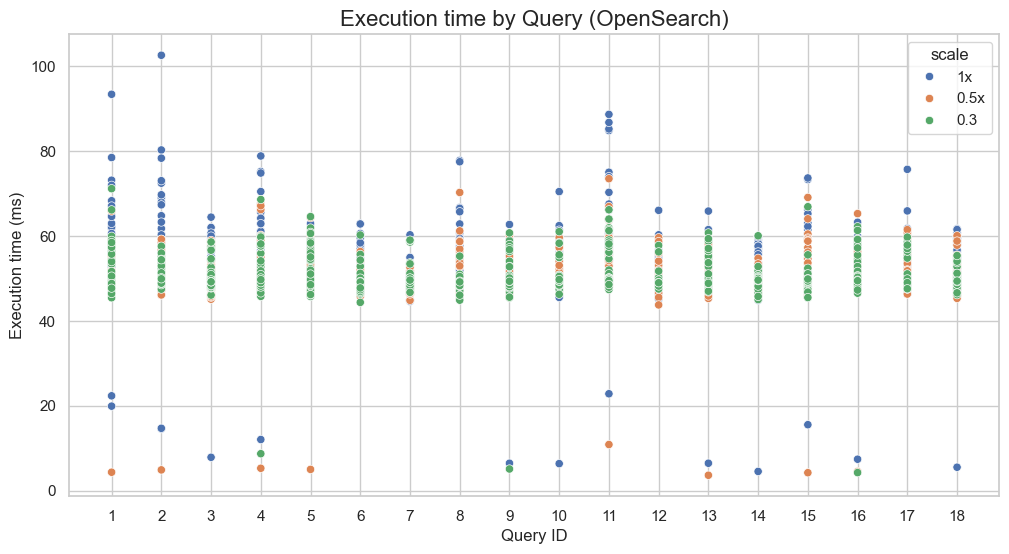

In [17]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
df_results['query_id'] = df_results['query_id'].astype(str)
sns.scatterplot(data=df_results, x='query_id', y='execution_time', hue='scale')
plt.title("Execution time by Query (OpenSearch)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
plt.show()

C:\Users\jidsc\AppData\Local\Temp\ipykernel_15468\1010354412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['query_id'] = df_results['query_id'].astype(str)


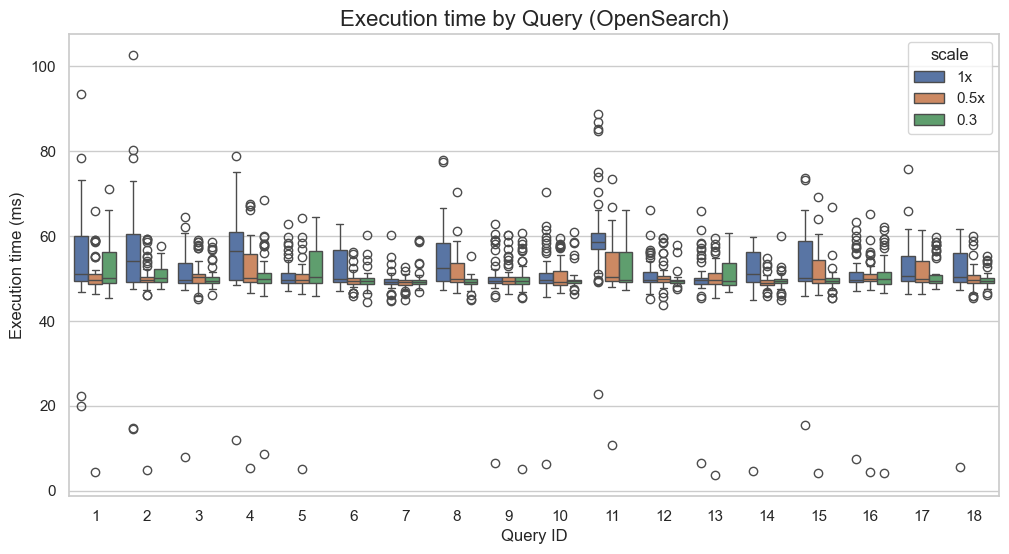

In [18]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
df_results['query_id'] = df_results['query_id'].astype(str)
sns.boxplot(data=df_results, x='query_id', y='execution_time', hue='scale')
plt.title("Execution time by Query (OpenSearch)", fontsize=16)
plt.xlabel("Query ID", fontsize=12)
plt.ylabel("Execution time (ms)", fontsize=12)
plt.show()